<a href="https://colab.research.google.com/github/valeriazv/G3Patrones/blob/main/Challenges/Ejercicio_visualizacion_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Ejercicio práctico | Visualización y pre-procesamiento de datos}$$



Autor: Emilio Ochoa

[Contexto] La visualización y el pre-procesamiento de datos es una de las etapas mas importantes dentro de la generación de algoritmos predictivos; sin un buen analisis exploratorio previo, muchas variables de interés pueden ser pasadas por alto; o peor aún, utilizar todas las variables pueden afectar al modelo en un futuro. Como analista de datos, se te solicita evaluar el siguiente dataset, referente al análisis de falla cardiaca en diversos pacientes:



Citacion: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Recopilado de https://www.kaggle.com/fedesoriano/heart-failure-prediction.

# Carga de dataset y librerias

1)Carga las librerias que consideres pertinentes (matplotlib, sklearn, etc); posterior a eso carga el archivo heart.csv

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df_heart = pd.read_csv("heart.csv")
df_heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Análisis Exploratorio

2)Ingresa a la referencia citada y menciona las características (columnas) del dataset; haz un analisis exploratorio de la data, mencionando datos estadisticos que consideres a tu criterio.

In [ ]:
# Lets print some additional information and summary statistics of the data
print(df_heart.info())
df_heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

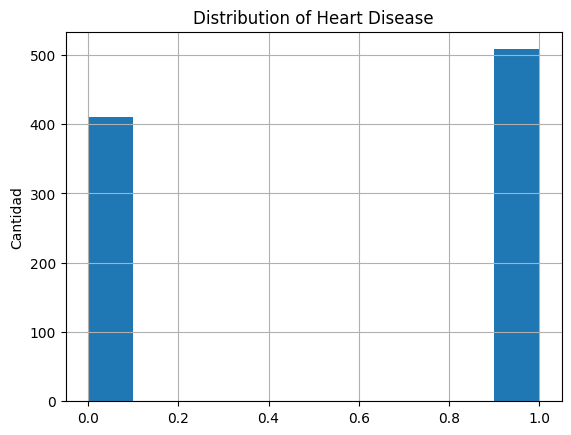

In [ ]:
plt.hist(df_heart['HeartDisease'])
plt.title(('Distribution of ' +  'Heart Disease'))
plt.grid()
plt.ylabel("Cantidad")
plt.show()

# Visualización de la data

4) Muestra con gráficos lo siguiente: \\

*  Distribución de las variable
*  Relación entre las variables
*  Outliers en las variables

Adicional a esto, añadir un gráfico que consideres pertinente para el análisis.

Distribucion de las variables

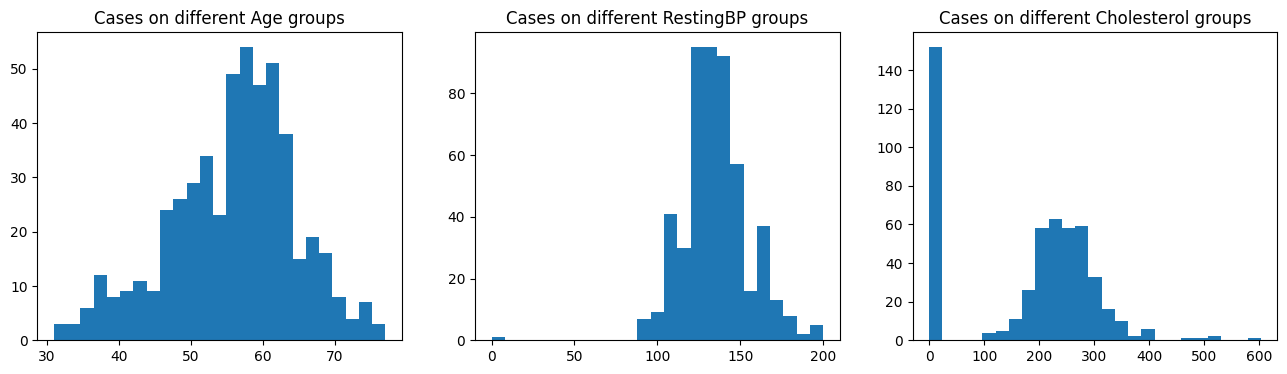

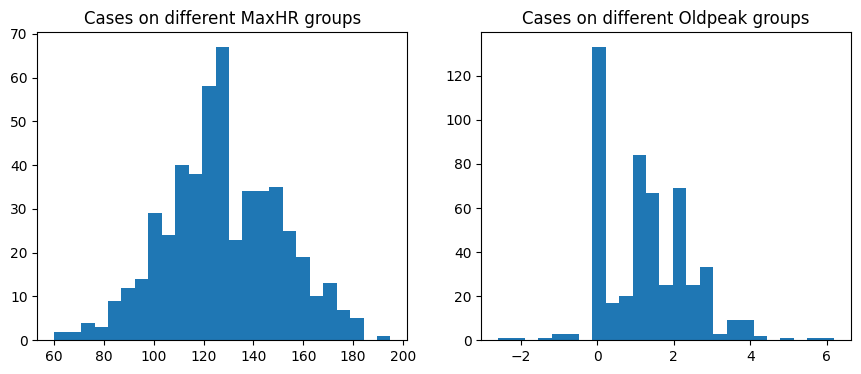

In [ ]:
patients = df_heart[df_heart['HeartDisease'] == 1]

# plt.hist(df_heart['Age'], bins=10)
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0
for feature in ['Age', 'RestingBP', 'Cholesterol']:
    axs[count].hist(patients[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['MaxHR', 'Oldpeak']:
    axs2[count].hist(patients[feature], bins=25)
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

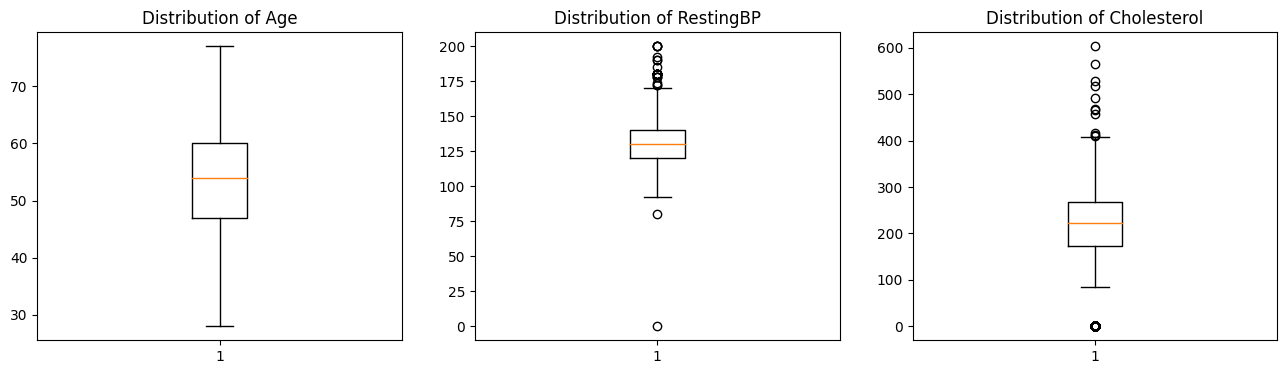

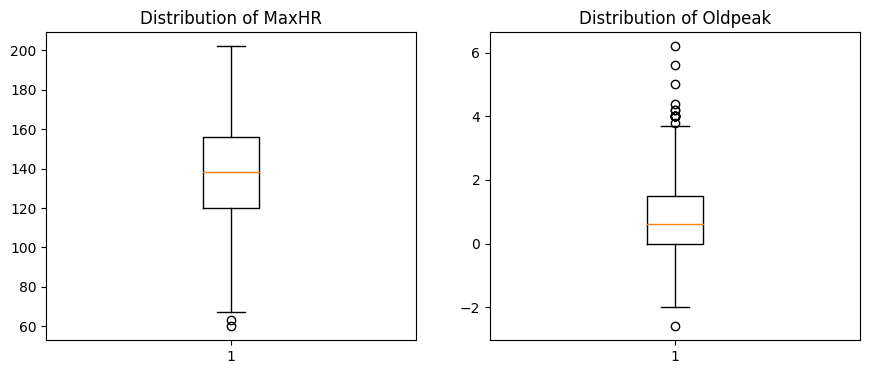

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0
for feature in ['Age', 'RestingBP', 'Cholesterol']:
    axs[count].boxplot(df_heart[feature])
    axs[count].set_title(('Distribution of ' + feature))
    count += 1

count = 0
for feature in ['MaxHR', 'Oldpeak']:
    axs2[count].boxplot(df_heart[feature])
    axs2[count].set_title(('Distribution of ' +  feature))
    count += 1

plt.show()

<ipython-input-16-292fc3288893>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_heart.corr()


<Axes: >

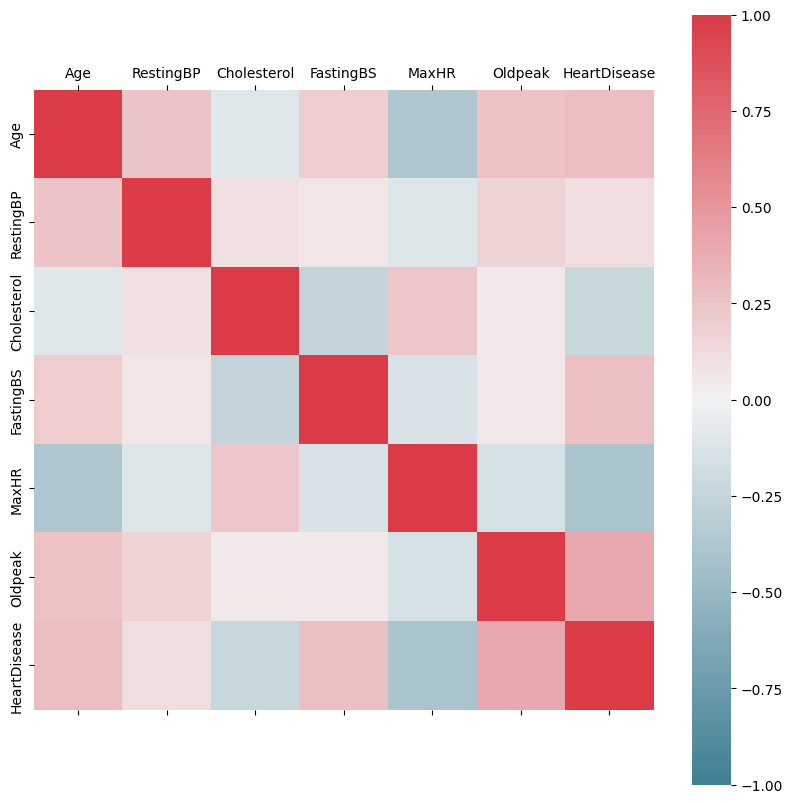

In [ ]:
import seaborn as sns
#plt.matshow(df_heart.corr())
#plt.show()
#
corr = df_heart.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# Pre-procesamiento

5) Haz el análisis exploratorio de la data (graficos, análisis de rangos y datos extremos, etc). Comenta en base a las gráficas que datos no son viables clinicamente.

En función de los gráficos y el análisis estadístico, podrías buscar valores atípicos (outliers) que estén muy lejos de la mayoría de los datos y que puedan no ser viables clínicamente. Estos valores podrían indicar problemas en la medición o podrían ser indicativos de una condición rara.

6) Ejecuta la limpieza de datos según el criterio analizado previamente. Evalua la cantidad de datos crudos vs la cantidad de datos que quedan posterior a la limpieza.

In [ ]:
print('Data size before cleaning: ', len(df_heart))
df_heart_clean = df_heart[(df_heart['Cholesterol'] > 5) &
                         (df_heart['RestingBP'] > 10)]
print('Data size after cleaning: ', len(df_heart_clean))

Data size before cleaning:  918
Data size after cleaning:  746


7) Vuelve a utilizar gráficas para evaluar los datos limpios. Comenta tus resultados.

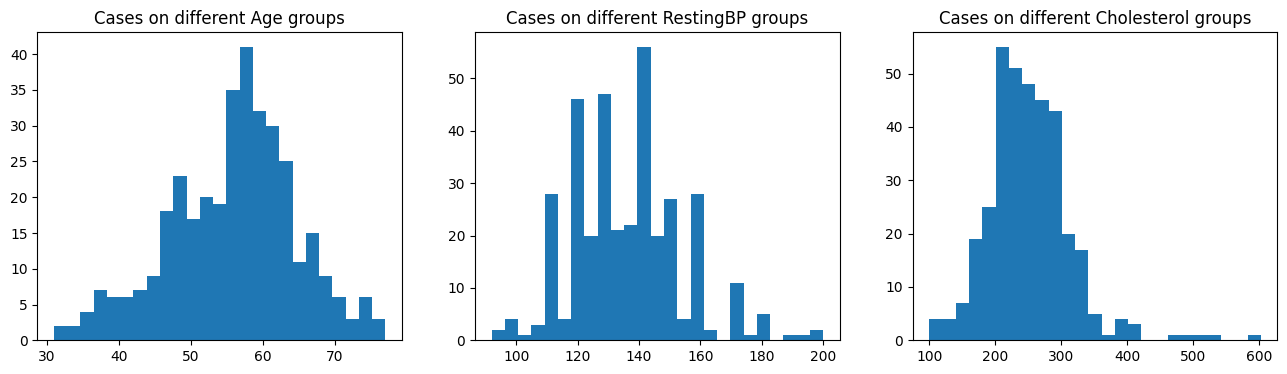

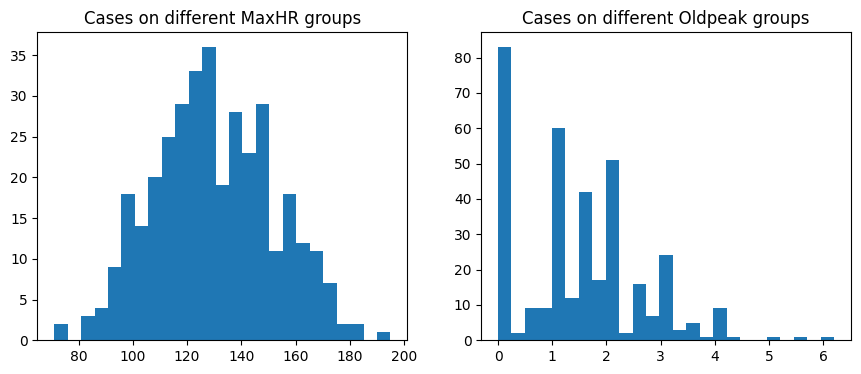

In [ ]:
patients = df_heart_clean[df_heart_clean['HeartDisease'] == 1]

# plt.hist(df_heart['Age'], bins=10)
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0
for feature in ['Age', 'RestingBP', 'Cholesterol']:
    axs[count].hist(patients[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['MaxHR', 'Oldpeak']:
    axs2[count].hist(patients[feature], bins=25)
    axs2[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

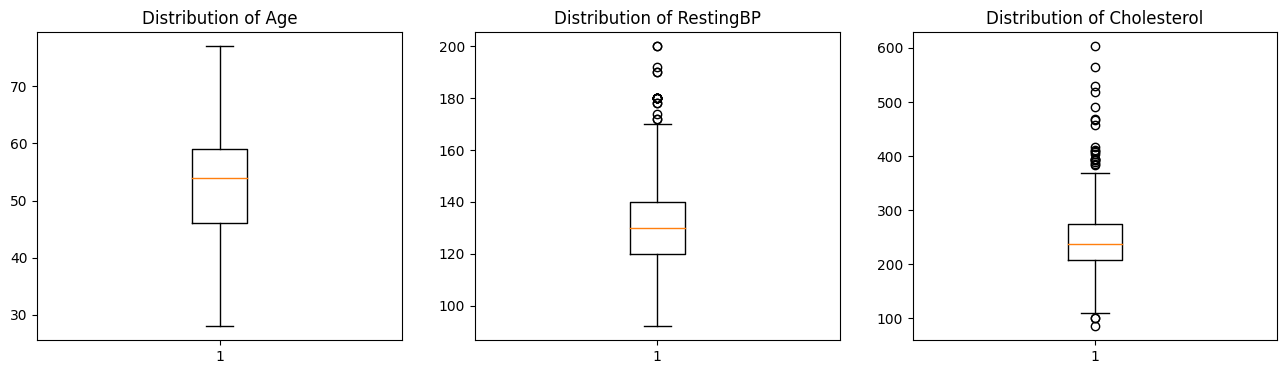

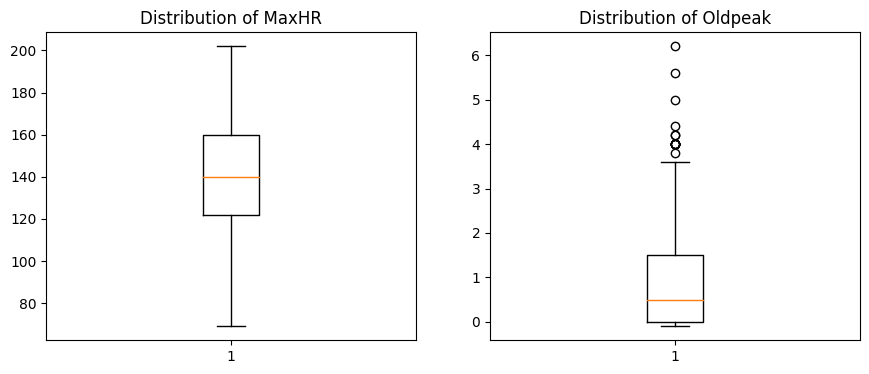

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig2, axs2 = plt.subplots(1, 2, figsize=(10.5, 4))

count = 0
for feature in ['Age', 'RestingBP', 'Cholesterol']:
    axs[count].boxplot(df_heart_clean[feature])
    axs[count].set_title(('Distribution of ' + feature))
    count += 1

count = 0
for feature in ['MaxHR', 'Oldpeak']:
    axs2[count].boxplot(df_heart_clean[feature])
    axs2[count].set_title(('Distribution of ' +  feature))
    count += 1

plt.show()

# Procesamiento y Modelamiento

In [ ]:
#import label encoder
from sklearn import preprocessing
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df_heart_clean['ChestPainType'] = label_encoder.fit_transform(df_heart_clean['ChestPainType'])
df_heart_clean['Sex'] = label_encoder.fit_transform(df_heart_clean['Sex'])
df_heart_clean['RestingECG'] = label_encoder.fit_transform(df_heart_clean['RestingECG'])
df_heart_clean['ExerciseAngina'] = label_encoder.fit_transform(df_heart_clean['ExerciseAngina'])
df_heart_clean['ST_Slope'] = label_encoder.fit_transform(df_heart_clean['ST_Slope'])


<ipython-input-24-4a381a2c8520>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_clean['ChestPainType'] = label_encoder.fit_transform(df_heart_clean['ChestPainType'])
<ipython-input-24-4a381a2c8520>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_clean['Sex'] = label_encoder.fit_transform(df_heart_clean['Sex'])
<ipython-input-24-4a381a2c8520>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,1,130,283,0,ST,98,N,0.0,Up,0
3,48,F,0,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_heart_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


8) Propón un método predictivo para la data evaluada. Comenten sus resultados
**Hint: **Leer la documentación de la libreria lazypredict

In [ ]:
!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy

!pip -q install lazypredict

Downloading...
From: https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
To: /content/cancer_challenge_cl2.csv
100% 123k/123k [00:00<00:00, 61.9MB/s]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df_heart_clean.drop(['HeartDisease'], axis=1)
y = df_heart_clean['HeartDisease']

data_normalized = scaler.fit_transform(X)

# Convertir el resultado a un nuevo dataframe
X = pd.DataFrame(data_normalized, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


 97%|█████████▋| 28/29 [00:01<00:00, 19.73it/s]

[LightGBM] [Info] Number of positive: 283, number of negative: 313
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474832 -> initscore=-0.100756
[LightGBM] [Info] Start training from score -0.100756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 29/29 [00:01<00:00, 16.13it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.89,0.89,0.89,0.89,0.33
BaggingClassifier,0.89,0.89,0.89,0.89,0.05
SVC,0.88,0.88,0.88,0.88,0.03
RandomForestClassifier,0.88,0.88,0.88,0.88,0.24
ExtraTreesClassifier,0.87,0.87,0.87,0.87,0.17
KNeighborsClassifier,0.87,0.87,0.87,0.87,0.02
NuSVC,0.86,0.86,0.86,0.86,0.03
XGBClassifier,0.86,0.86,0.86,0.86,0.12
AdaBoostClassifier,0.86,0.86,0.86,0.86,0.14
